In [12]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 5.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 23.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [6]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

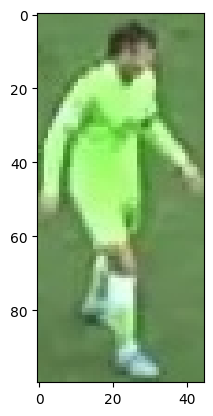

In [7]:
plt.imshow(image)
plt.show()

# take the top half of the image

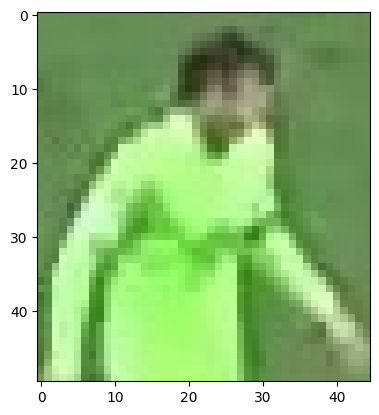

In [8]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# cluster the image into two clusters

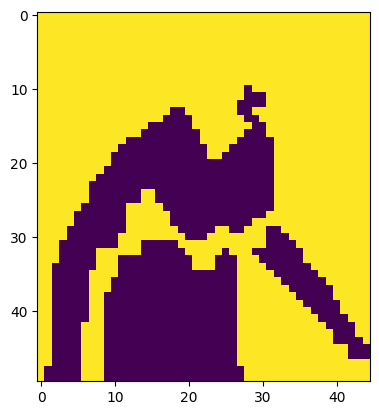

In [16]:
# reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image, cmap='gray')
plt.imshow(clustered_image)
plt.show()

In [17]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [19]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [20]:
kmeans.cluster_centers_[player_cluster]

array([176.11335013, 242.46599496, 140.47732997])